In [2]:
!git clone https://github.com/shionguha/inf2178-expdesignfordatascience-w23.git

Cloning into 'inf2178-expdesignfordatascience-w23'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 97 (delta 26), reused 19 (delta 15), pack-reused 60
Unpacking objects: 100% (97/97), 1.50 MiB | 2.58 MiB/s, done.


# Available Research Questions: <br>
* Analyze the number of strip searches performed by the Toronto police associate with Race, Sex, Age, and Time. 


# Load Packages

In [3]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=c1c306e96e98df8751c07d5d0b4a5b16f3d087af2342d000183099339c0a46e5
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
#import necessary Packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as mc


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print('Lets get started')

Lets get started


# Prepare Data

In [5]:
df = pd.read_csv('/content/inf2178-expdesignfordatascience-w23/project dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

## Check duplicate entries

In [7]:
#Check Duplicates by EventID, ArrestID, & PersonID
df.duplicated(subset=['EventID','ArrestID','PersonID']).sum()

4

In [8]:
#There are 2 paires of 4 duplicate entries. Keep the last entry of each pair
df = df.drop_duplicates(subset=['EventID','ArrestID','PersonID'], keep='last')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65272 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65272 non-null  int64  
 1   Arrest_Month                     65272 non-null  object 
 2   EventID                          65272 non-null  int64  
 3   ArrestID                         64805 non-null  float64
 4   PersonID                         65272 non-null  int64  
 5   Perceived_Race                   65268 non-null  object 
 6   Sex                              65272 non-null  object 
 7   Age_group__at_arrest_            65248 non-null  object 
 8   Youth_at_arrest__under_18_years  65272 non-null  object 
 9   ArrestLocDiv                     65272 non-null  object 
 10  StripSearch                      65272 non-null  int64  
 11  Booked                           65272 non-null  int64  
 12  Occurrence_Categor

## Missing Values

In [9]:
df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             467
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57473
SearchReason_AssistEscape          57473
SearchReason_PossessWeapons        57473
SearchReason_PossessEvidence       57473
ItemsFound                         57473
ObjectId        

In [10]:
#Deal with the Age_group__at_arrest_ missing value
#Fill other searchreason related columns and itemfound with 0
df = df.fillna(value = {
    'ArrestID': 9999999,
    'SearchReason_CauseInjury': 0,
    'SearchReason_AssistEscape': 0,
    'SearchReason_PossessWeapons': 0,
    'SearchReason_PossessEvidence':0,
    'ItemsFound': 0
    })

#Fill the missing value in Occurrence_Category with the value of the cell directly above it
df['Occurrence_Category'].fillna(method='ffill', inplace=True)

#There are only 24 values missing in this column under the total entries of 65276, let's drop them
#Drop the perceived race null value as well since there are only 4 missing values
df = df.dropna()

df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

In [11]:
#df.info()

## Group Data, Create Tables for Analysis

### Table 1: ssif
**(Number of Strip search & item founds)**

Strip search times and Item Founds per year, month, sex, age group. 

In [12]:
ssif = df.groupby(['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_'])['StripSearch','ItemsFound'].sum().reset_index()
ssif.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,ItemsFound
0,2020,Apr-June,Black,F,Aged 17 years and younger,3,1.0
1,2020,Apr-June,Black,F,Aged 18 to 24 years,17,11.0
2,2020,Apr-June,Black,F,Aged 25 to 34 years,12,5.0
3,2020,Apr-June,Black,F,Aged 35 to 44 years,6,2.0
4,2020,Apr-June,Black,F,Aged 45 to 54 years,7,4.0


In [13]:
print(ssif[['StripSearch','ItemsFound']].describe())

       StripSearch  ItemsFound
count   863.000000  863.000000
mean      9.035921    3.373117
std      31.122948   12.258898
min       0.000000    0.000000
25%       0.000000    0.000000
50%       1.000000    0.000000
75%       4.000000    1.000000
max     323.000000  130.000000


In [14]:
#trip search & item found without year & month. 
ssif1 = df.groupby(['Perceived_Race','Sex','Age_group__at_arrest_'])['StripSearch','ItemsFound'].sum().reset_index()
ssif1[['StripSearch','ItemsFound']].describe()
ssif1.head()

,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,ItemsFound
0,Black,F,Aged 17 years and under,1,0.0
1,Black,F,Aged 17 years and younger,11,5.0
2,Black,F,Aged 18 to 24 years,83,41.0
3,Black,F,Aged 25 to 34 years,85,29.0
4,Black,F,Aged 35 to 44 years,42,20.0


### Table 2: arrests
(Number of Arrests)
Arrests per year, month, sex, age group.

In [15]:
arrests = df.groupby(['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_'])['StripSearch'].count().reset_index()
arrests = arrests.rename(columns={'StripSearch': 'Arrests'})
arrests.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Arrests
0,2020,Apr-June,Black,F,Aged 17 years and younger,36
1,2020,Apr-June,Black,F,Aged 18 to 24 years,87
2,2020,Apr-June,Black,F,Aged 25 to 34 years,98
3,2020,Apr-June,Black,F,Aged 35 to 44 years,52
4,2020,Apr-June,Black,F,Aged 45 to 54 years,26


In [16]:
print(arrests[['Arrests']].describe())

          Arrests
count  863.000000
mean    75.601390
std    140.033493
min      1.000000
25%      9.000000
50%     24.000000
75%     77.500000
max    924.000000


### Table 3: arrssif
Merged of table1&2

In [17]:
arrssif = pd.merge(ssif,arrests,how='inner',on=['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_'])
arrssif.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,ItemsFound,Arrests
0,2020,Apr-June,Black,F,Aged 17 years and younger,3,1.0,36
1,2020,Apr-June,Black,F,Aged 18 to 24 years,17,11.0,87
2,2020,Apr-June,Black,F,Aged 25 to 34 years,12,5.0,98
3,2020,Apr-June,Black,F,Aged 35 to 44 years,6,2.0,52
4,2020,Apr-June,Black,F,Aged 45 to 54 years,7,4.0,26


In [18]:
print(arrssif[['StripSearch','ItemsFound','Arrests']].describe())

       StripSearch  ItemsFound     Arrests
count   863.000000  863.000000  863.000000
mean      9.035921    3.373117   75.601390
std      31.122948   12.258898  140.033493
min       0.000000    0.000000    1.000000
25%       0.000000    0.000000    9.000000
50%       1.000000    0.000000   24.000000
75%       4.000000    1.000000   77.500000
max     323.000000  130.000000  924.000000


### Table 4: ss_occ
Strip Search associate with Sex, age, and occurance_category


In [19]:
ss_occ = df.groupby(['Sex','Age_group__at_arrest_','Occurrence_Category'])['StripSearch'].sum().reset_index()
ss_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sex                    444 non-null    object
 1   Age_group__at_arrest_  444 non-null    object
 2   Occurrence_Category    444 non-null    object
 3   StripSearch            444 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.0+ KB


In [20]:
print(ss_occ[['StripSearch']].describe())

       StripSearch
count   444.000000
mean     17.563063
std      49.275639
min       0.000000
25%       0.000000
50%       1.000000
75%       8.250000
max     456.000000


## Table 3 Cleaning

In [21]:
#Decides to analyze the arrest and strip search associated with perceived_race, and Sex
arrssif = arrssif.groupby(['Arrest_Month','Perceived_Race','Sex'])['StripSearch','Arrests','ItemsFound'].sum().reset_index()
arrssif['portion'] = round(arrssif['StripSearch']/arrssif['Arrests'],2)
arrssif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrest_Month    69 non-null     object 
 1   Perceived_Race  69 non-null     object 
 2   Sex             69 non-null     object 
 3   StripSearch     69 non-null     int64  
 4   Arrests         69 non-null     int64  
 5   ItemsFound      69 non-null     float64
 6   portion         69 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [22]:
#check the number of unique values of each categorical columns 

print(arrssif['Sex'].value_counts())

F    32
M    32
U     5
Name: Sex, dtype: int64


In [23]:
#Remove 8 entries of 'U'
arrssif = arrssif[arrssif['Sex']!='U']

arrssif['Sex'].value_counts()

F    32
M    32
Name: Sex, dtype: int64

In [24]:
#check for Perceived_Race column
print(arrssif['Perceived_Race'].value_counts(), '\n')

#check for the date columsn
print(arrssif[['Arrest_Month']].value_counts(), '\n')

Black                   8
East/Southeast Asian    8
Indigenous              8
Latino                  8
Middle-Eastern          8
South Asian             8
Unknown or Legacy       8
White                   8
Name: Perceived_Race, dtype: int64 

Arrest_Month
Apr-June        16
Jan-Mar         16
July-Sept       16
Oct-Dec         16
dtype: int64 



# EDA

In [25]:
arrssif.head()

,Arrest_Month,Perceived_Race,Sex,StripSearch,Arrests,ItemsFound,portion
0,Apr-June,Black,F,47,712,24.0,0.07
1,Apr-June,Black,M,531,3341,200.0,0.16
2,Apr-June,East/Southeast Asian,F,6,162,1.0,0.04
3,Apr-June,East/Southeast Asian,M,88,820,28.0,0.11
4,Apr-June,Indigenous,F,14,129,7.0,0.11


## Month Plot


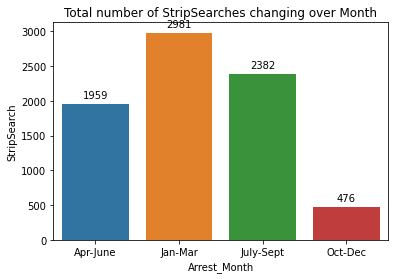

In [26]:
# Strip Search

month_ss = arrssif.groupby(['Arrest_Month'])['StripSearch'].sum().reset_index()
#year_month_ss.head()

ss_month = sns.barplot(data=month_ss,y='StripSearch',x='Arrest_Month')

ss_month.set_title('Total number of StripSearches changing over Month')

# # add annotations to the plot
for p in ss_month.patches:
    ss_month.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

plt.show()

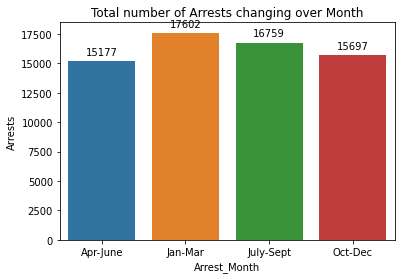

In [27]:
# Number of Arrests

month_arr = arrssif.groupby(['Arrest_Month'])['Arrests'].sum().reset_index()
#year_month_ss.head()

arr_month = sns.barplot(data=month_arr,y='Arrests',x='Arrest_Month')

arr_month.set_title('Total number of Arrests changing over Month')

# # add annotations to the plot
for p in arr_month.patches:
    arr_month.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

plt.show()

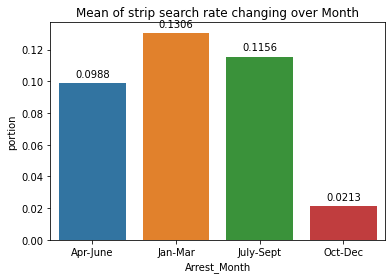

In [28]:
# Portions

month_por = arrssif.groupby(['Arrest_Month'])['portion'].mean().reset_index()

por_month = sns.barplot(data=month_por,y='portion',x='Arrest_Month')

por_month.set_title('Mean of strip search rate changing over Month')

# # add annotations to the plot
for p in por_month.patches:
    por_month.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 


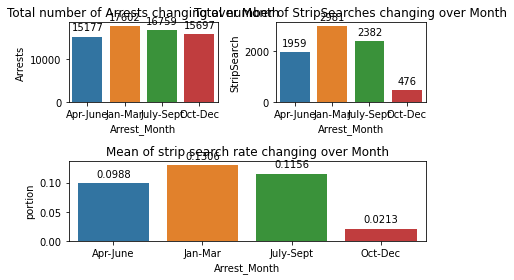

In [29]:
# # Strip Search

ss_month = plt.subplot(222)
month_ss = arrssif.groupby(['Arrest_Month'])['StripSearch'].sum().reset_index()

ss_month = sns.barplot(data=month_ss,y='StripSearch',x='Arrest_Month')

ss_month.set_title('Total number of StripSearches changing over Month')

# # add annotations to the plot
for p in ss_month.patches:
    ss_month.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 



# Number of Arrests

arr_month = plt.subplot(221)
month_arr = arrssif.groupby(['Arrest_Month'])['Arrests'].sum().reset_index()

arr_month = sns.barplot(data=month_arr,y='Arrests',x='Arrest_Month')

arr_month.set_title('Total number of Arrests changing over Month')

# add annotations to the plot
for p in arr_month.patches:
    arr_month.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 



# Portions

por_month = plt.subplot(212)
month_por = arrssif.groupby(['Arrest_Month'])['portion'].mean().reset_index()

por_month = sns.barplot(data=month_por,y='portion',x='Arrest_Month')

por_month.set_title('Mean of strip search rate changing over Month')

# # add annotations to the plot
for p in por_month.patches:
    por_month.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 



# # Packing all the plots and displaying them
plt.tight_layout()
plt.show()

## Box Plots

In [30]:
#Define one function to show the median value of box plots
#code from: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value

import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.2f'):

  lines = ax.get_lines()
  boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
  lines_per_box = int(len(lines) / len(boxes))

  for median in lines[4:len(lines):lines_per_box]:
      x, y = (data.mean() for data in median.get_data())

      # choose value depending on horizontal or vertical plot orientation
      value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
      text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                      fontweight='bold', color='white')
      
      # create median-colored border around white text for contrast
      text.set_path_effects([
          path_effects.Stroke(linewidth=3, foreground=median.get_color()),
          path_effects.Normal(),
      ])

### Strip Search BoxPlots

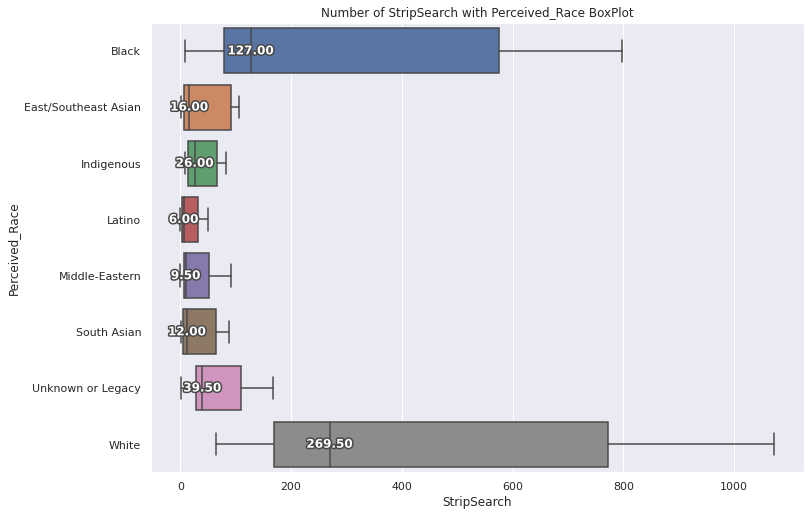

In [31]:
#Box plot between Perceived_Race and number of Strip Search
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="StripSearch", showfliers=False)   

add_median_labels(ax)
ax.set_title('Number of StripSearch with Perceived_Race BoxPlot')
plt.show()

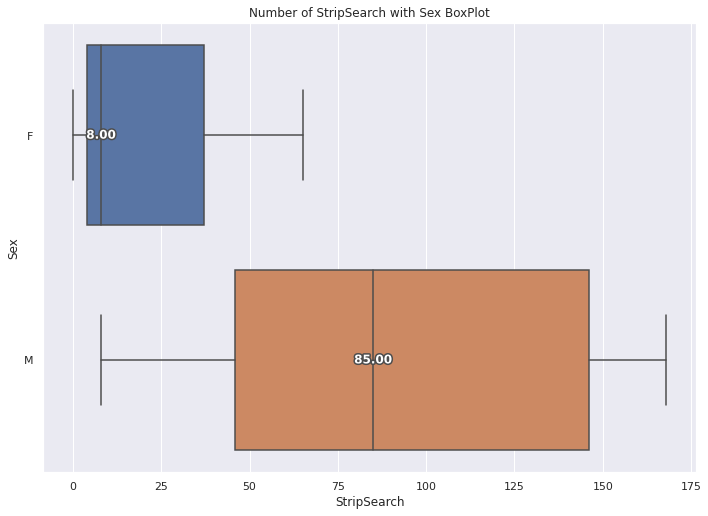

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sex_ss_boxplot = sns.boxplot(data=arrssif, y="Sex", x="StripSearch", showfliers=False)

add_median_labels(sex_ss_boxplot)
sex_ss_boxplot.set_title('Number of StripSearch with Sex BoxPlot')
plt.show()

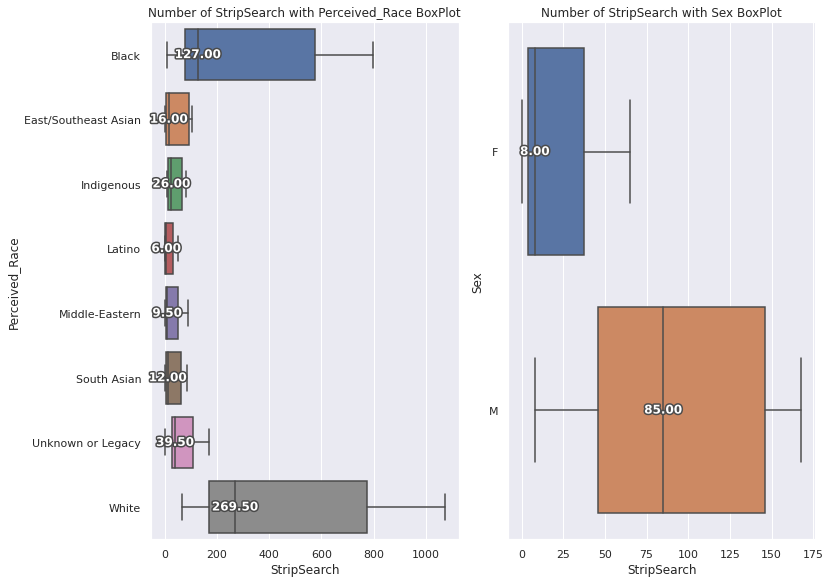

In [33]:
sex_ss_boxplot = plt.subplot(122)
sex_ss_boxplot = sns.boxplot(data=arrssif, y="Sex", x="StripSearch", showfliers=False)
add_median_labels(sex_ss_boxplot)
sex_ss_boxplot.set_title('Number of StripSearch with Sex BoxPlot')

ax = plt.subplot(121)
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="StripSearch", showfliers=False)   
add_median_labels(ax)
ax.set_title('Number of StripSearch with Perceived_Race BoxPlot')

plt.tight_layout()
plt.show()

### Number of Arrests BoxPlots

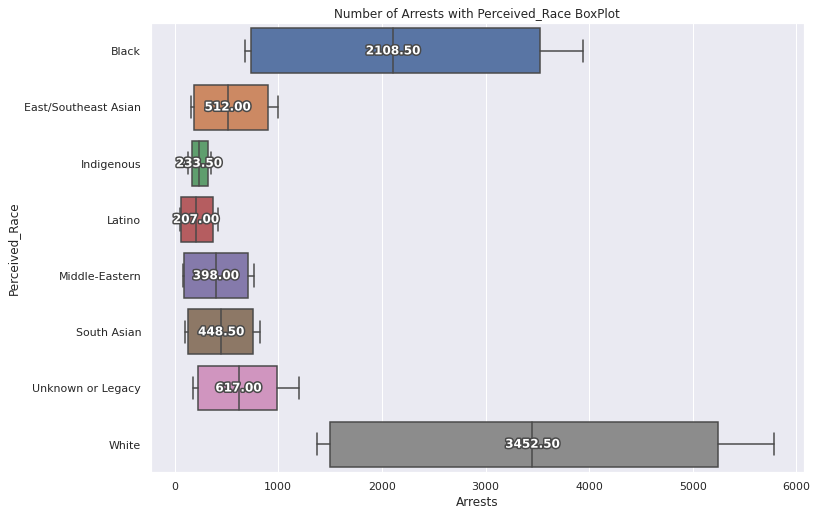

In [34]:
#Box plot between Perceived_Race and number of number of arrests
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="Arrests", showfliers=False)   

add_median_labels(ax)
ax.set_title('Number of Arrests with Perceived_Race BoxPlot')
plt.show()

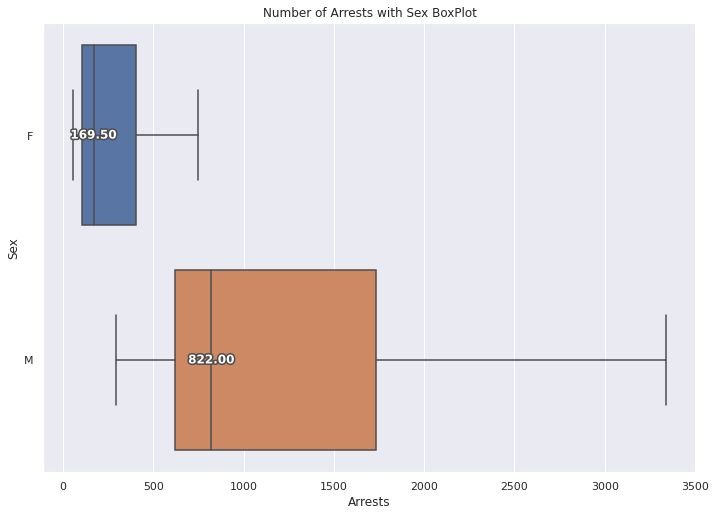

In [35]:
#Box plot between Sex and number of number of arrests
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=arrssif, y="Sex", x="Arrests", showfliers=False)   

add_median_labels(ax)
ax.set_title('Number of Arrests with Sex BoxPlot')
plt.show()

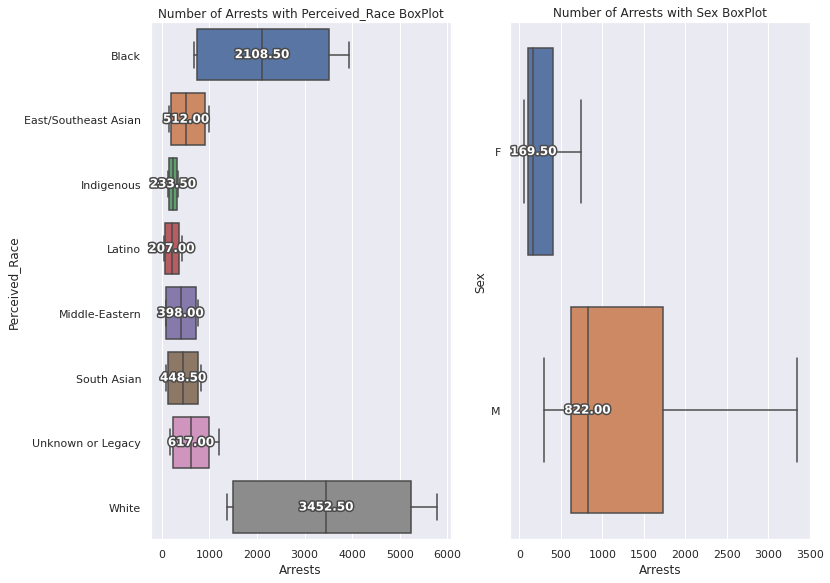

In [36]:
ax = plt.subplot(121)
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="Arrests", showfliers=False)   
add_median_labels(ax)
ax.set_title('Number of Arrests with Perceived_Race BoxPlot')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(data=arrssif, y="Sex", x="Arrests", showfliers=False)   
add_median_labels(ax2)
ax2.set_title('Number of Arrests with Sex BoxPlot')

plt.tight_layout()
plt.show()

### Strip Search Portion BoxPlots

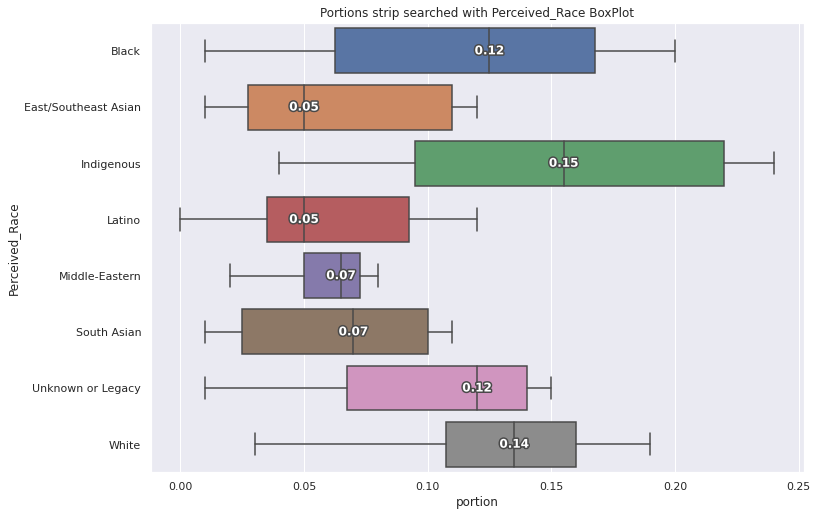

In [37]:
#Box plot between Perceived_Race and the portion of arrests being strip searched
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="portion", showfliers=False)   

add_median_labels(ax)
ax.set_title('Portions strip searched with Perceived_Race BoxPlot')
plt.show()

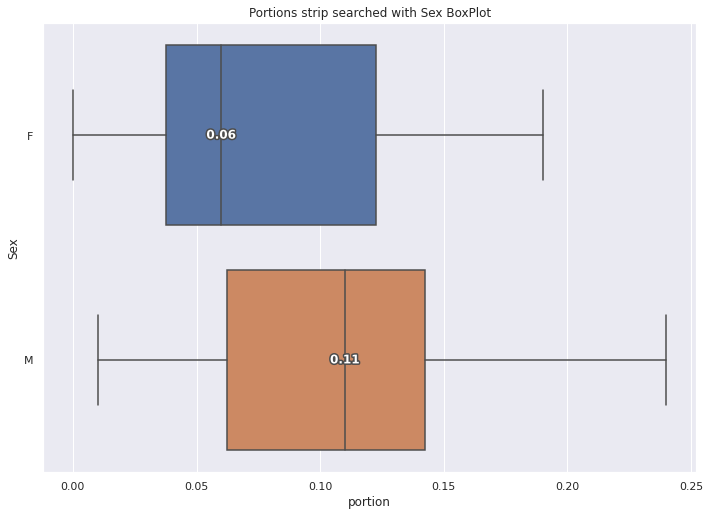

In [38]:
#Box plot between Sex and the portion of arrests being strip searched
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=arrssif, y="Sex", x="portion", showfliers=False)   

add_median_labels(ax)
ax.set_title('Portions strip searched with Sex BoxPlot')
plt.show()

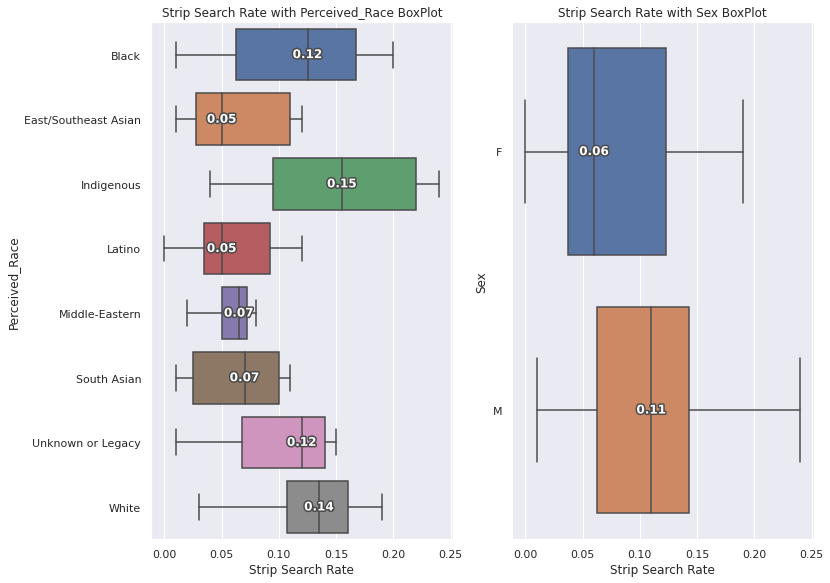

In [39]:
ax1 = plt.subplot(121)
ax = sns.boxplot(data=arrssif, y="Perceived_Race", x="portion", showfliers=False)   
add_median_labels(ax)
ax.set_title('Strip Search Rate with Perceived_Race BoxPlot')
ax.set_xlabel('Strip Search Rate')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(data=arrssif, y="Sex", x="portion", showfliers=False)   
add_median_labels(ax2)
ax2.set_title('Strip Search Rate with Sex BoxPlot')
ax2.set_xlabel('Strip Search Rate')

plt.tight_layout()
plt.show()

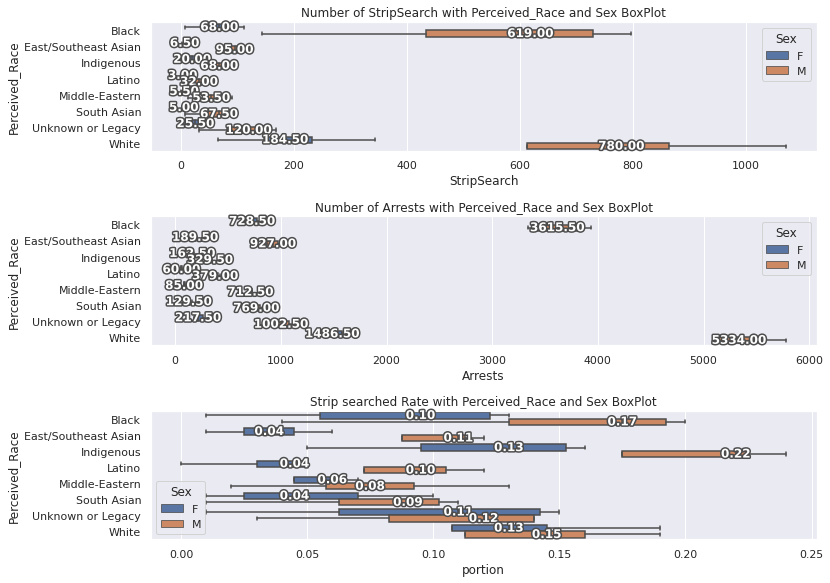

In [40]:
ax_ss = plt.subplot(311)
ax_ss = sns.boxplot(data=arrssif, y="Perceived_Race", x="StripSearch", hue = 'Sex', showfliers=False)   
add_median_labels(ax_ss)
ax_ss.set_title('Number of StripSearch with Perceived_Race and Sex BoxPlot')


ax_arr = plt.subplot(312)
ax_arr = sns.boxplot(data=arrssif, y="Perceived_Race", x="Arrests", hue = 'Sex', showfliers=False)   
add_median_labels(ax_arr)
ax_arr.set_title('Number of Arrests with Perceived_Race and Sex BoxPlot')


ax_rate = plt.subplot(313)
ax_rate = sns.boxplot(data=arrssif, y="Perceived_Race", x="portion", hue = 'Sex', showfliers=False)   
add_median_labels(ax_rate)
ax_rate.set_title('Strip searched Rate with Perceived_Race and Sex BoxPlot')

plt.tight_layout()
plt.show()

## Other Plots (Pointplots&ScatterPlots)

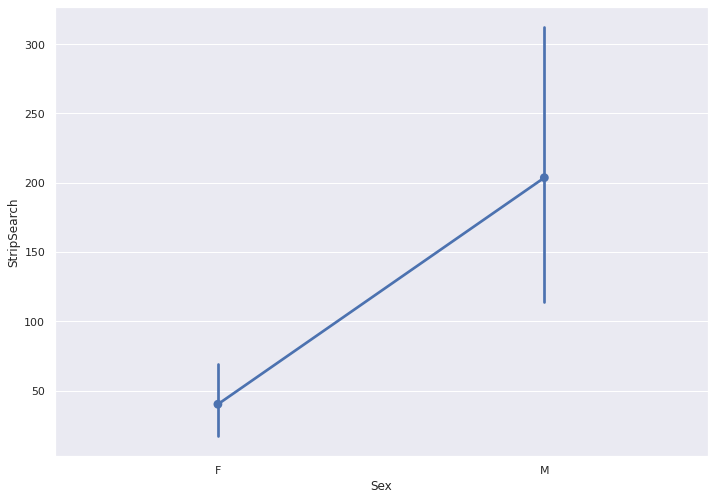

  Sex  StripSearch
0   F     40.09375
1   M    203.59375


In [41]:
sex_ss_pointplots=sns.pointplot(data=arrssif, x='Sex', y='StripSearch', errorbar='sd')

mean_ss = pd.DataFrame(data=arrssif.groupby('Sex')[['StripSearch']].mean()).reset_index()

# for x, y in zip(mean_ss['Sex'], mean_ss['StripSearch']):
#   plt.annotate('{:.2f}'.format(y), 
#                xy=(x, y), 
#                xytext=(5, 5), 
#                textcoords='offset points',
#                ha='left', va='bottom') 
  
plt.show()

print(mean_ss)

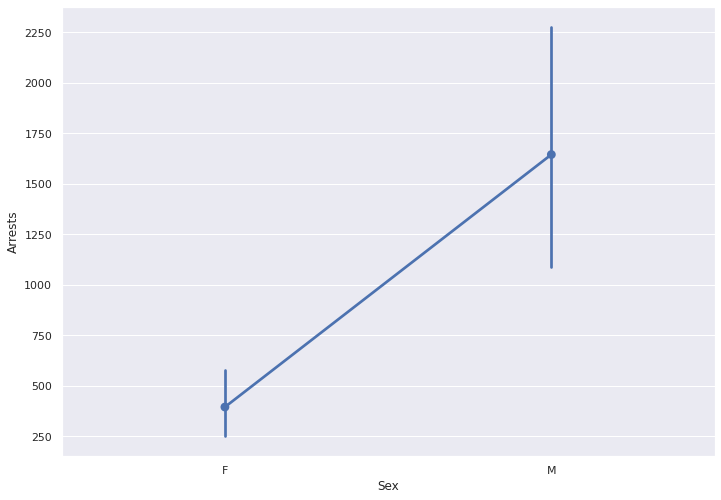

  Sex     Arrests
0   F   393.96875
1   M  1644.62500


In [42]:
sex_arr_pointplots=sns.pointplot(data=arrssif, x='Sex', y='Arrests', errorbar='sd')

mean_arr = pd.DataFrame(data=arrssif.groupby('Sex')[['Arrests']].mean()).reset_index()

plt.show()

print(mean_arr)

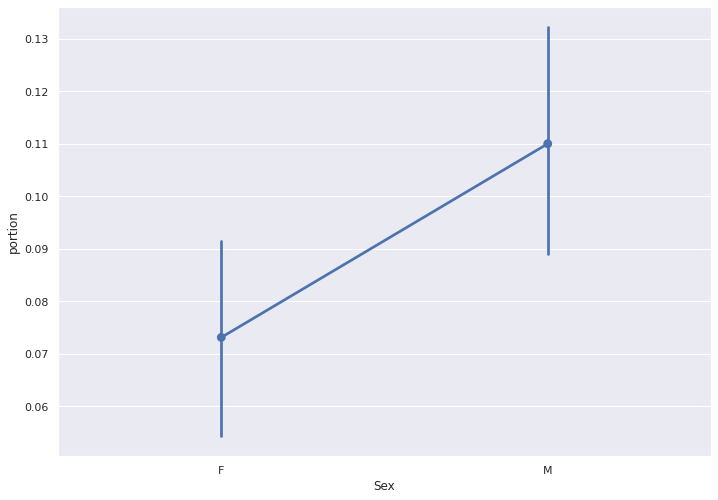

  Sex   portion
0   F  0.073125
1   M  0.110000


In [43]:
sex_arr_pointplots=sns.pointplot(data=arrssif, x='Sex', y='portion', errorbar='sd')

mean_arr = pd.DataFrame(data=arrssif.groupby('Sex')[['portion']].mean()).reset_index()

plt.show()

print(mean_arr)

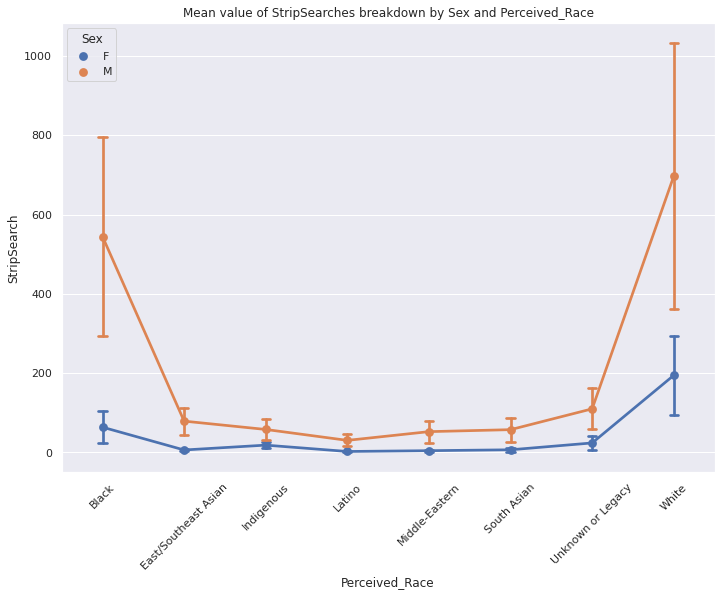

In [44]:
ax1=sns.pointplot(data=arrssif, x='Perceived_Race', y='StripSearch',hue='Sex', capsize=.1, ci='sd')

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title('Mean value of StripSearches breakdown by Sex and Perceived_Race')
plt.show()

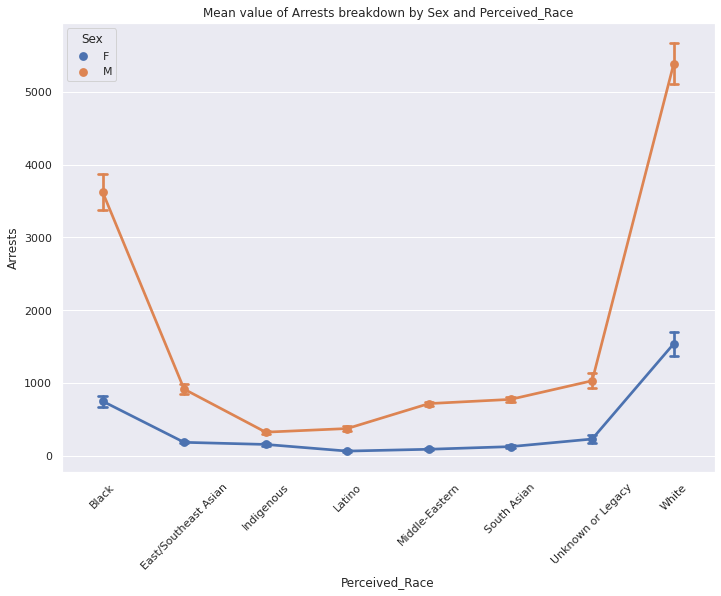

In [45]:
ax1=sns.pointplot(data=arrssif, x='Perceived_Race', y='Arrests',hue='Sex', capsize=.1, ci='sd')

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title('Mean value of Arrests breakdown by Sex and Perceived_Race')
plt.show()

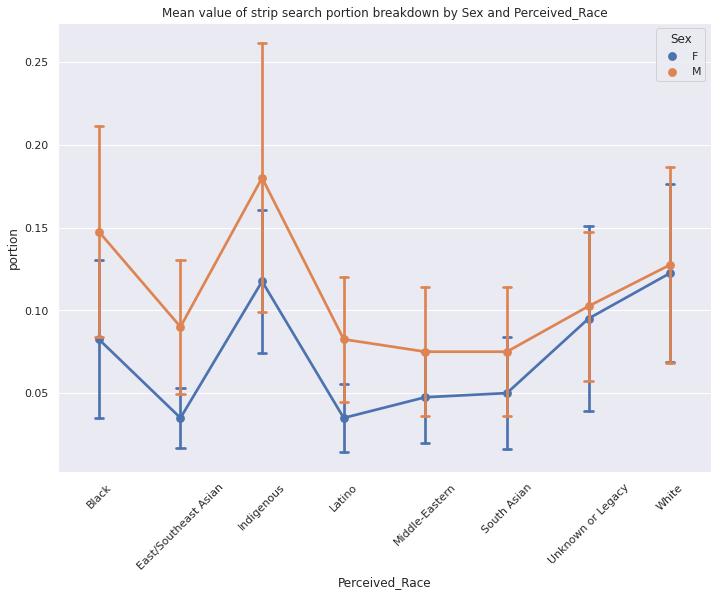

In [46]:
ax1=sns.pointplot(data=arrssif, x='Perceived_Race', y='portion',hue='Sex', capsize=.1, ci='sd')

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title('Mean value of strip search portion breakdown by Sex and Perceived_Race')
plt.show()

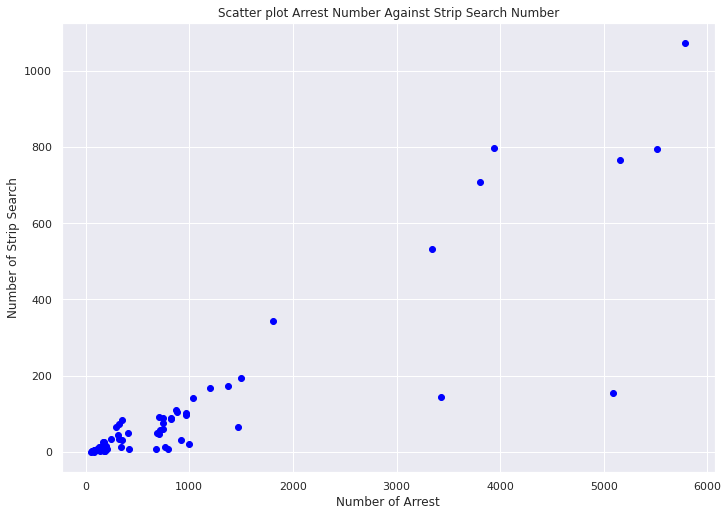

In [47]:
plt.scatter(arrssif['Arrests'], arrssif['StripSearch'], color='blue')

plt.xlabel("Number of Arrest")
plt.ylabel("Number of Strip Search")
plt.title("Scatter plot Arrest Number Against Strip Search Number")
plt.show()

## Tables

In [48]:
group_mean = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['StripSearch'].mean()).reset_index()
group_mean.columns = ['Sex','Perceived_Race','StripSearch_mean']

group_std = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['StripSearch'].std()).reset_index()
group_std.columns = ['Sex','Perceived_Race','StripSearch_std']

group_summary = pd.merge(group_mean,group_std,how='inner',on=['Sex','Perceived_Race'])
group_summary

,Sex,Perceived_Race,StripSearch_mean,StripSearch_std
0,F,Black,63.75,45.675486
1,F,East/Southeast Asian,6.25,4.112988
2,F,Indigenous,18.50,9.000000
3,F,Latino,2.50,1.732051
4,F,Middle-Eastern,4.50,3.109126
5,F,South Asian,6.75,6.500000
6,F,Unknown or Legacy,24.00,19.270011
7,F,White,194.50,114.805633
8,M,Black,544.50,289.566918
9,M,East/Southeast Asian,79.00,39.370039


In [52]:
group_mean = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['Arrests'].mean()).reset_index()
group_mean.columns = ['Sex','Perceived_Race','Arrests_mean']

group_std = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['Arrests'].std()).reset_index()
group_std.columns = ['Sex','Perceived_Race','Arrests_std']

arrests_summary = pd.merge(group_mean,group_std,how='inner',on=['Sex','Perceived_Race'])
arrests_summary

,Sex,Perceived_Race,Arrests_mean,Arrests_std
0,F,Black,752.00,87.471900
1,F,East/Southeast Asian,186.25,17.557050
2,F,Indigenous,157.25,19.771613
3,F,Latino,66.00,15.534907
4,F,Middle-Eastern,91.00,13.391540
5,F,South Asian,127.25,25.038304
6,F,Unknown or Legacy,231.50,60.555759
7,F,White,1540.50,188.641636
8,M,Black,3627.00,286.567037
9,M,East/Southeast Asian,916.75,80.118142


In [53]:
group_mean = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['portion'].mean()).reset_index()
group_mean.columns = ['Sex','Perceived_Race','portion_mean']

group_std = pd.DataFrame(data=arrssif.groupby(['Sex','Perceived_Race'])['portion'].std()).reset_index()
group_std.columns = ['Sex','Perceived_Race','portion_std']

portion_summary = pd.merge(group_mean,group_std,how='inner',on=['Sex','Perceived_Race'])
portion_summary

,Sex,Perceived_Race,portion_mean,portion_std
0,F,Black,0.0825,0.055000
1,F,East/Southeast Asian,0.0350,0.020817
2,F,Indigenous,0.1175,0.049917
3,F,Latino,0.0350,0.023805
4,F,Middle-Eastern,0.0475,0.032016
5,F,South Asian,0.0500,0.039158
6,F,Unknown or Legacy,0.0950,0.064550
7,F,White,0.1225,0.061847
8,M,Black,0.1475,0.073655
9,M,East/Southeast Asian,0.0900,0.046904


In [54]:
summary = pd.merge(portion_summary,pd.merge(group_summary,arrests_summary,how='inner',on=['Sex','Perceived_Race']),
                   how='inner',on=['Sex','Perceived_Race'])
summary

,Sex,Perceived_Race,portion_mean,portion_std,StripSearch_mean,StripSearch_std,Arrests_mean,Arrests_std
0,F,Black,0.0825,0.055000,63.75,45.675486,752.00,87.471900
1,F,East/Southeast Asian,0.0350,0.020817,6.25,4.112988,186.25,17.557050
2,F,Indigenous,0.1175,0.049917,18.50,9.000000,157.25,19.771613
3,F,Latino,0.0350,0.023805,2.50,1.732051,66.00,15.534907
4,F,Middle-Eastern,0.0475,0.032016,4.50,3.109126,91.00,13.391540
5,F,South Asian,0.0500,0.039158,6.75,6.500000,127.25,25.038304
6,F,Unknown or Legacy,0.0950,0.064550,24.00,19.270011,231.50,60.555759
7,F,White,0.1225,0.061847,194.50,114.805633,1540.50,188.641636
8,M,Black,0.1475,0.073655,544.50,289.566918,3627.00,286.567037
9,M,East/Southeast Asian,0.0900,0.046904,79.00,39.370039,916.75,80.118142


# T-tests

## Sex and StripSearch 

In [55]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [56]:
arrssif['Sex'].unique()

array(['F', 'M'], dtype=object)

In [57]:
# Conduct Sex t-test (F is female, M is male)
# create sex groups from dataset
# More comparison to be completed, but focusing on the study between Female and Male would be sufficient for now
F_Sex = arrssif[arrssif['Sex']=='F']
M_Sex = arrssif[arrssif['Sex']=='M']

F_Strip = F_Sex['StripSearch']
M_Strip = M_Sex['StripSearch']
#conduct ttest
print('Ttest results for strip search:',stats.ttest_ind(F_Strip, M_Strip, equal_var=False)) #p value is significant

Ttest results for strip search: Ttest_indResult(statistic=-3.07216044134599, pvalue=0.00410284111357108)


In [58]:
# calculate mean and standard deviation of groups 
# male has higher mean strip search numbers
print('Mean StripSearch for Female, Male:',F_Strip.mean(), M_Strip.mean())
print('Standard deviation for Female, Male:',F_Strip.std(), M_Strip.std())

Mean StripSearch for Female, Male: 40.09375 203.59375
Standard deviation for Female, Male: 73.53443756543267 291.93844461384043


In [59]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(F_Strip), sms.DescrStatsW(M_Strip))
print('Confidence interval for Strip Search:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Strip Search: (-271.5511826789166, -55.448817321083396)


In [ ]:
#welch dof 
print('DOF for Strip Search:',welch_dof(F_Strip, M_Strip))

In [ ]:
#Performing t tests using pg.ttest
pg.ttest(F_Strip,M_Strip)

## Sex and Arrests


In [ ]:
#Performing the t test between Male Arrests and Female Arrests
pg.ttest(M_Sex['Arrests'],F_Sex['Arrests'])

## Sex and Portion

In [ ]:
#Performing the t test between Male portion and Female portion
pg.ttest(M_Sex['portion'],F_Sex['portion'])

## Interaction between Sex and Perceived Race on Strip Search Counts

In [ ]:
#Interaction plot of Sex, Perceived_Race, and StripSearch

sex = arrssif['Sex'].astype("category")
stripsearch = arrssif['StripSearch'].values

ax = interaction_plot(arrssif['Perceived_Race'], sex, stripsearch,
             colors=['red','blue'], markers=['D','^'], 
             ylabel='strip search', xlabel='Perceived Race')
plt.xticks(rotation=45, ha='right')

plt.show()

## Interaction between Sex and Perceived Race on Arrests Counts

In [ ]:
#Interaction plot of Sex, Perceived_Race, and Arrests

sex = arrssif['Sex'].astype("category")
arrests = arrssif['Arrests'].values

ax = interaction_plot(arrssif['Perceived_Race'], sex, arrests,
             colors=['red','blue'], markers=['D','^'], 
             ylabel='arrests', xlabel='Perceived Race')
plt.xticks(rotation=45, ha='right')

plt.show()

## Interaction between Sex and Perceived Race on Portion

In [ ]:
#Interaction plot of Sex, Perceived_Race, and Portion

sex = arrssif['Sex'].astype("category")
arrests = arrssif['portion'].values

ax = interaction_plot(arrssif['Perceived_Race'], sex, arrests,
             colors=['red','blue'], markers=['D','^'], 
             ylabel='portion', xlabel='Perceived Race')
plt.xticks(rotation=45, ha='right')

plt.show()

# Anova Analysis

## Strip Search ANOVA Analysis

### One Way ANOVA

In [ ]:
#One way ANOVA between perceived sex and strip search
sex_ss_aov = pg.anova(data=arrssif, dv='StripSearch', between='Sex', detailed=True)
print(sex_ss_aov)

In [ ]:
#One way ANOVA between perceived race and strip search
race_ss_aov = pg.anova(data=arrssif, dv='StripSearch', between='Perceived_Race', detailed=True)
print(race_ss_aov)

In [ ]:
arrssif2 = arrssif.groupby(['Arrest_Month','Perceived_Race','Sex'])['StripSearch','Arrests','ItemsFound'].sum().reset_index()
arrssif2.info()

In [ ]:
#Tukey's HSD of sex with respect to strip search
tk1 = mc.MultiComparison(arrssif['StripSearch'], arrssif['Sex'])
result = tk1.tukeyhsd()

print('Tukey HSD results for Sex with respect to StripSearch:')
print(result)

In [ ]:
#Tukey's HSD of race with respect to strip search
tk2 = mc.MultiComparison(arrssif['StripSearch'], arrssif['Perceived_Race'])
result = tk2.tukeyhsd()

print('Tukey HSD results for Perceived_Race with respect to StripSearch:')
print(result)

### Two Way ANOVA

In [ ]:
tw_model = ols('StripSearch ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data=arrssif).fit()
print(tw_model.summary())

In [ ]:
sm.stats.anova_lm(tw_model, typ=2)

## Arrests ANOVA Analysis

### One Way ANOVA

In [ ]:
#One way ANOVA between perceived sex and arrests
sex_arr_aov = pg.anova(data=arrssif, dv='Arrests', between='Sex', detailed=True)
print(sex_arr_aov)

In [ ]:
#One way ANOVA between perceived race and arrests
race_arr_aov = pg.anova(data=arrssif, dv='Arrests', between='Perceived_Race', detailed=True)
print(race_arr_aov)

In [ ]:
#Tukey's HSD of sex with respect to arrests
tk3 = mc.MultiComparison(arrssif['Arrests'], arrssif['Sex'])
result = tk3.tukeyhsd()

print('Tukey HSD results for Sex with respect to Arrests:')
print(result)

In [ ]:
#Tukey's HSD of race with respect to arrests
tk4 = mc.MultiComparison(arrssif['Arrests'], arrssif['Perceived_Race'])
result = tk4.tukeyhsd()

print('Tukey HSD results for Perceived_Race with respect to Arrests:')
print(result)

### Two Way ANOVA

In [ ]:
tw_model2 = ols('Arrests ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data=arrssif).fit()
print(tw_model2.summary())

In [ ]:
sm.stats.anova_lm(tw_model2, typ=2)

## Portion ANOVA Analysis

### One Way ANOVA

In [ ]:
#One way ANOVA between perceived sex and portion
sex_arr_aov = pg.anova(data=arrssif, dv='portion', between='Sex', detailed=True)
print(sex_arr_aov)

In [ ]:
#One way ANOVA between perceived race and portion
race_arr_aov = pg.anova(data=arrssif, dv='portion', between='Perceived_Race', detailed=True)
print(race_arr_aov)

In [ ]:
#Tukey's HSD of sex with respect to portion
tk5 = mc.MultiComparison(arrssif['portion'], arrssif['Sex'])
result = tk5.tukeyhsd()

print('Tukey HSD results for Sex with respect to portion:')
print(result)

In [ ]:
#Tukey's HSD of perceived race with respect to portion
tk5 = mc.MultiComparison(arrssif['portion'], arrssif['Perceived_Race'])
result = tk5.tukeyhsd()

print('Tukey HSD results for perceived race with respect to portion:')
print(result)

### Two Way ANOVA

In [ ]:
tw_model3 = ols('portion ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data=arrssif).fit()
print(tw_model3.summary())

In [ ]:
sm.stats.anova_lm(tw_model3, typ=2)